### GSE 21942 - Multiple Sclerosis vs  Healthy

#### Importing libraries

In [69]:
#Importing libraries
import pandas as pd

#### Load the dataset

In [70]:
# Read the tab-separated file into a DataFrame
file_path = r'F:\p-value Final year Project\RSS submission\GSE 21942 - Multiple Sclerosis vs Healthy\GSE21942.top.table.tsv'
df_0 = pd.read_csv(file_path, sep='\t')

# Sorting the df according to gene ID
df = df_0.sort_values(by='ID').reset_index(drop=True)

# Display the DataFrame
print(df)

# Getting the p-values as a numpy array
p_values = df['P.Value'].values.astype(float)
p_values


                         ID  adj.P.Val   P.Value      t     B   logFC  \
0                 1007_s_at   0.389000  0.183000 -1.370 -5.70 -0.1540   
1                   1053_at   0.052800  0.008790  2.810 -3.07  0.2050   
2                    117_at   0.959000  0.919000  0.103 -6.61  0.0173   
3                    121_at   0.151000  0.039100 -2.160 -4.42 -0.0959   
4                 1255_g_at   0.132000  0.032200 -2.250 -4.25 -0.0401   
...                     ...        ...       ...    ...   ...     ...   
54670  AFFX-r2-Ec-bioC-5_at   0.000191  0.000005 -5.610  4.06 -1.3500   
54671  AFFX-r2-Ec-bioD-3_at   0.391000  0.185000 -1.360 -5.71 -0.0952   
54672  AFFX-r2-Ec-bioD-5_at   0.709000  0.532000  0.633 -6.41  0.0607   
54673   AFFX-r2-P1-cre-3_at   0.344000  0.148000  1.490 -5.54  0.0753   
54674   AFFX-r2-P1-cre-5_at   0.125000  0.029800  2.290 -4.18  0.1280   

          Gene.symbol                                         Gene.title  \
0      MIR4640///DDR1  microRNA 4640///discoidi

array([0.183  , 0.00879, 0.919  , ..., 0.532  , 0.148  , 0.0298 ])

#### Histogram of p-values

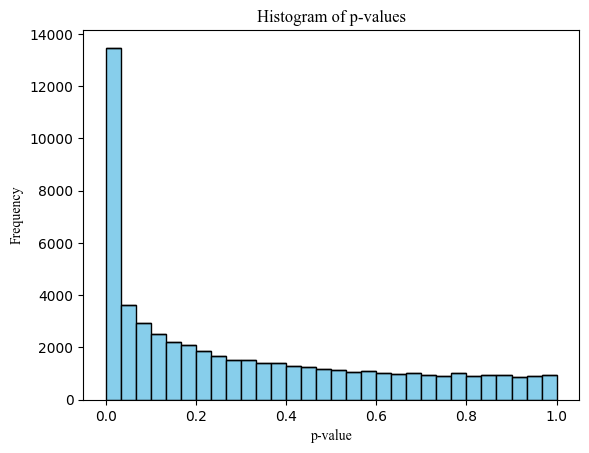

In [71]:
# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = []
multidst_hist(p_values, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple')

#### Classical multiple-testing

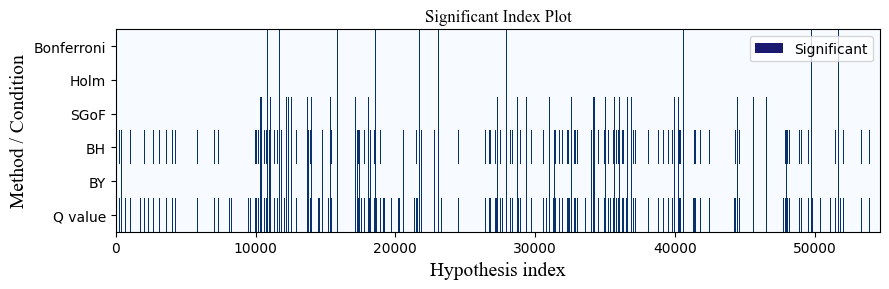


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value  \
0        15406         893   898  2836  8904  4086    11767   

         pi0 estimate  
0  0.4979839547740783   



In [72]:
# Carrying out multi test
from multidst.functions import multitest
res = multitest(p_values, alpha=0.05,sigplot=True, results = True)

#### Separating NaN genes

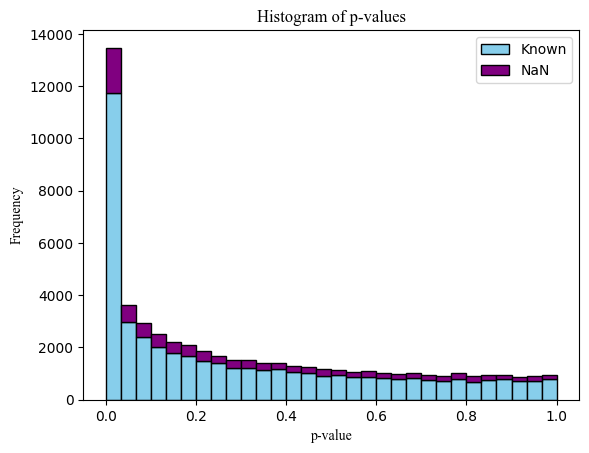

In [73]:
NaN_genes = df[df.isnull().any(axis=1)].index.tolist()

# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = NaN_genes
multidst_hist(p_values, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')

#### Independent Hypothesis Weighting

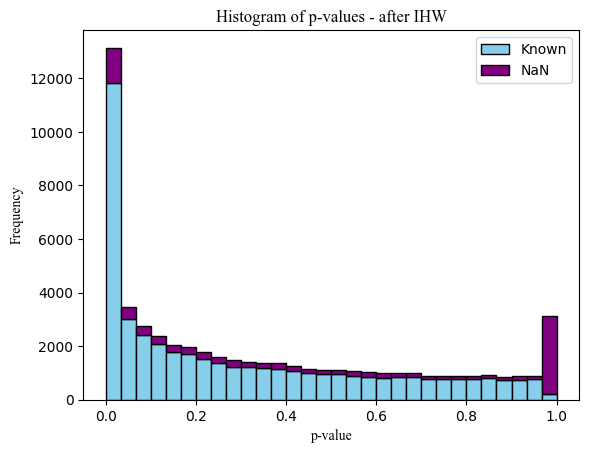

In [74]:
# CreatiNG IHW p-values
from multidst.utils.weighting import weighted_p_list

# Assigning twice as much weight to known than NaN
weightsIHW = []
for i in range(len(p_values)):
      if i in NaN_genes:
           weightsIHW.append(0.512865) 
      else:
            weightsIHW.append(1.025729)
weightsIHW     

w_ihw, p_ihw = weighted_p_list(p_values, weights=weightsIHW)

multidst_hist(p_ihw, g2_index, title="Histogram of p-values - after IHW",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')

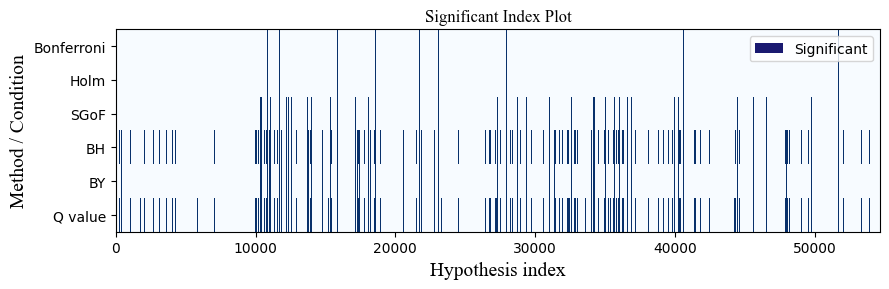


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value  \
0        15012         884   890  2836  8686  4025     9242   

         pi0 estimate  
0  0.8553019911044604   



In [75]:
# Carrying out MultiDST for a list of IHW p_values
res = multitest(p_ihw, alpha=0.05, sigplot=True, results=True)

In [76]:
# Print out the indices
bonf_p = res['Bonferroni']
holm_p = res['Holm']
sgof_p = res['SGoF']
bh_p = res['BH']
by_p = res['BY']
storey_q = res['Q-value']

In [77]:
[p_values[i] for i in bonf_p]

[np.float64(1.65e-07),
 np.float64(2.13e-07),
 np.float64(6.45e-07),
 np.float64(2.36e-08),
 np.float64(6.7e-08),
 np.float64(6.12e-09),
 np.float64(7.68e-08),
 np.float64(8.59e-07),
 np.float64(2.05e-08),
 np.float64(1.23e-07),
 np.float64(5.66e-07),
 np.float64(2e-08),
 np.float64(7.93e-07),
 np.float64(2.59e-09),
 np.float64(4.56e-08),
 np.float64(1.48e-07),
 np.float64(4.77e-10),
 np.float64(9.67e-08),
 np.float64(5.83e-07),
 np.float64(2.34e-09),
 np.float64(2.6e-07),
 np.float64(7.74e-07),
 np.float64(7.29e-08),
 np.float64(2.41e-08),
 np.float64(3.9e-07),
 np.float64(7.04e-08),
 np.float64(6.4e-10),
 np.float64(7.76e-07),
 np.float64(2.94e-08),
 np.float64(1.85e-09),
 np.float64(5.32e-10),
 np.float64(9.38e-07),
 np.float64(2.78e-07),
 np.float64(1.62e-08),
 np.float64(3.79e-07),
 np.float64(4.55e-07),
 np.float64(3.08e-08),
 np.float64(2.82e-07),
 np.float64(2.54e-07),
 np.float64(7.67e-07),
 np.float64(5.31e-09),
 np.float64(2.36e-07),
 np.float64(8.28e-07),
 np.float64(1.01e-

In [78]:
bonf_p

[50,
 88,
 254,
 283,
 602,
 614,
 1073,
 1193,
 1221,
 1255,
 1362,
 1382,
 1477,
 1532,
 1545,
 1553,
 1576,
 1584,
 1588,
 1598,
 1666,
 1869,
 1909,
 1912,
 1952,
 2102,
 2149,
 2159,
 2176,
 2230,
 2239,
 2315,
 2382,
 2395,
 2418,
 2435,
 2469,
 2591,
 2605,
 2667,
 2731,
 2834,
 3710,
 4043,
 4067,
 4153,
 4341,
 4359,
 4379,
 4380,
 4409,
 4513,
 4559,
 4633,
 4734,
 4821,
 5149,
 5174,
 5297,
 5438,
 6304,
 6561,
 7152,
 7212,
 7457,
 7461,
 7918,
 8024,
 8320,
 8486,
 8501,
 8604,
 8912,
 9046,
 9047,
 9136,
 9315,
 9318,
 9796,
 9949,
 9993,
 9998,
 10038,
 10052,
 10057,
 10062,
 10082,
 10086,
 10089,
 10114,
 10149,
 10210,
 10217,
 10230,
 10248,
 10253,
 10294,
 10314,
 10337,
 10338,
 10361,
 10375,
 10394,
 10395,
 10414,
 10449,
 10459,
 10467,
 10493,
 10496,
 10537,
 10544,
 10567,
 10576,
 10585,
 10659,
 10685,
 10744,
 10805,
 10827,
 10847,
 10862,
 10892,
 10962,
 10986,
 10994,
 10999,
 11000,
 11016,
 11033,
 11054,
 11091,
 11168,
 11174,
 11175,
 11182,
 1

In [79]:
[p_values[i] or i in bonf_p]

[np.float64(0.0298)]

#### Finding Gene ID of significant genes

In [80]:
# Rejections in common indices

from multidst.utils import common_indices

coms = common_indices(p_values,bonf_p,holm_p,sgof_p,bh_p,by_p,storey_q)

##### Rejections by all 06

In [81]:
# Rejections by all 06 methods
rejected_by_6 = coms[6]
six_df = df.iloc[rejected_by_6]

In [82]:
six_df_sorted = six_df.sort_values(by='P.Value') 
six_df_sorted

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,Gene.ID
34496,225239_at,1.010000e-08,1.840000e-13,-13.00,20.40,-2.170,MIR612///NEAT1,microRNA 612///nuclear paraspeckle assembly tr...,693197///283131
10394,200946_x_at,8.050000e-08,4.730000e-12,11.30,17.40,0.961,GLUD1,glutamate dehydrogenase 1,2746
37951,228697_at,8.050000e-08,5.440000e-12,11.30,17.20,3.100,HINT3,histidine triad nucleotide binding protein 3,135114
15071,205624_at,8.050000e-08,8.050000e-12,-11.10,16.90,-2.830,CPA3,carboxypeptidase A3,1359
53118,243869_at,8.050000e-08,8.610000e-12,-11.00,16.80,-0.963,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11558,202110_at,5.620000e-05,9.200000e-07,6.23,5.71,0.511,COX7B,cytochrome c oxidase subunit 7B,1349
10210,200762_at,5.630000e-05,9.250000e-07,6.23,5.70,0.572,DPYSL2,dihydropyrimidinase like 2,1808
15217,205770_at,5.660000e-05,9.310000e-07,6.23,5.70,0.578,GSR,glutathione-disulfide reductase,2936
2315,1555419_a_at,5.690000e-05,9.380000e-07,6.22,5.69,0.602,ASAH1,N-acylsphingosine amidohydrolase 1,427


##### Rejections by none

In [83]:
# Rejections by all 06 methods
rejected_by_0 = coms[0]
len(rejected_by_0)

45433

In [84]:
iter1_df = df.drop(rejected_by_0)
iter1_df

p_values2 = iter1_df['P.Value'].values.astype(float)
p_values2

array([8.79e-03, 8.81e-03, 2.13e-03, ..., 5.97e-04, 2.09e-06, 5.03e-06])

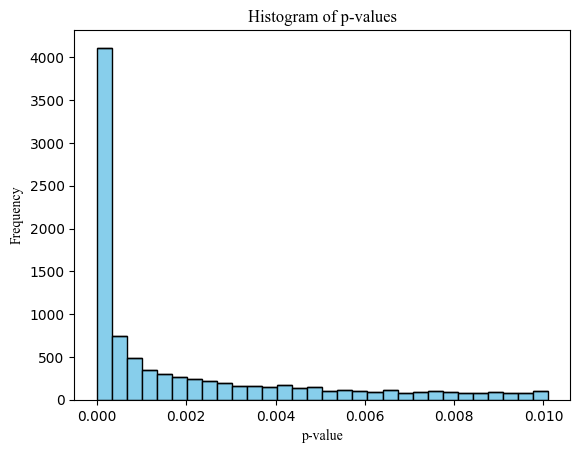

In [85]:
# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = []
multidst_hist(p_values2, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple')

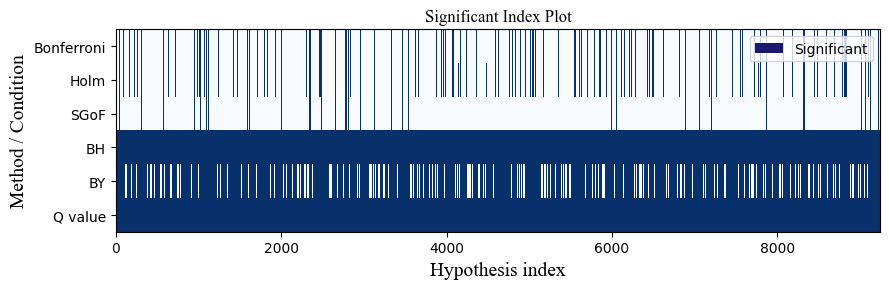


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value pi0 estimate
0         9242        1467  1541   504  9242  7448     9242          0.0 



In [86]:
# Carrying out multi test
from multidst.functions import multitest
res = multitest(p_values2, alpha=0.05,sigplot=True, results = True)

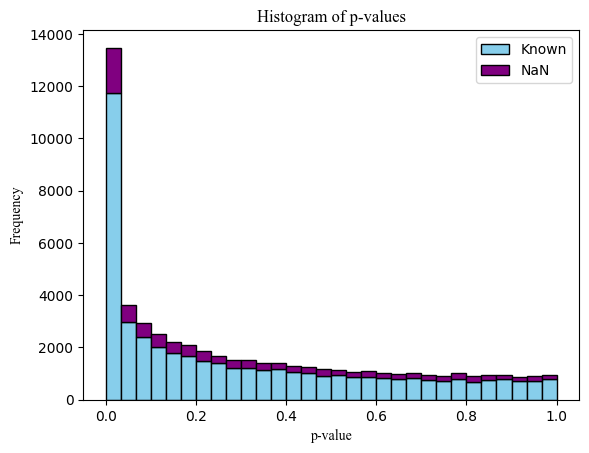

In [87]:
NaN_genes = df[df.isnull().any(axis=1)].index.tolist()

# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = NaN_genes
multidst_hist(p_values, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')

In [88]:
p_values

array([0.183  , 0.00879, 0.919  , ..., 0.532  , 0.148  , 0.0298 ])

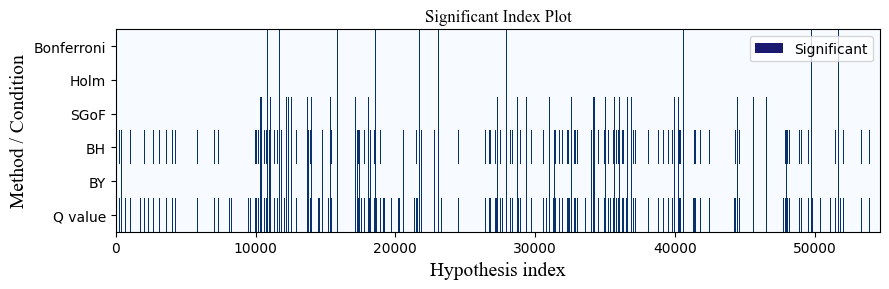


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value  \
0        15406         893   898  2836  8904  4086    11767   

         pi0 estimate  
0  0.4979839547740783   



In [89]:
# Carrying out multi test
from multidst.functions import multitest
res = multitest(p_values, alpha=0.05,sigplot=True, results = True)

#### Runtime

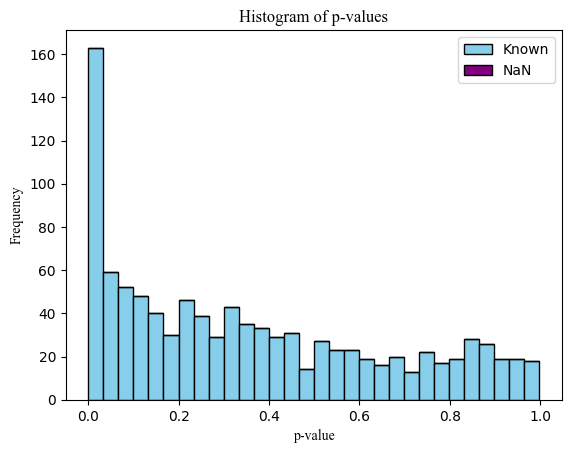

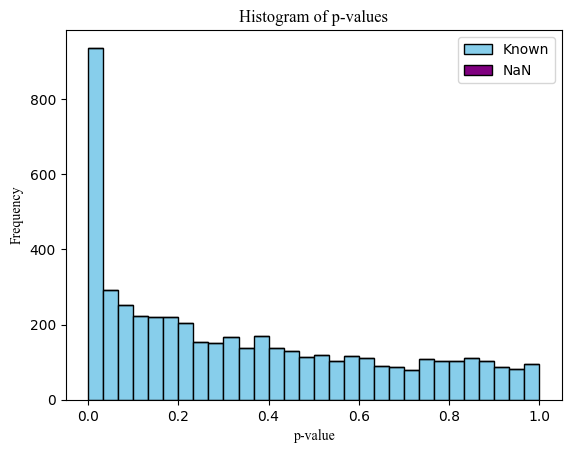

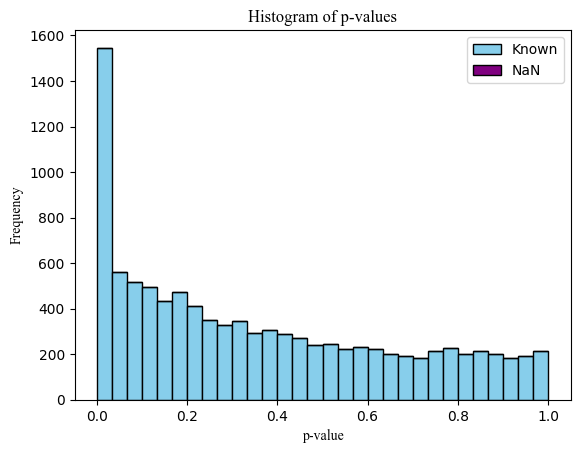

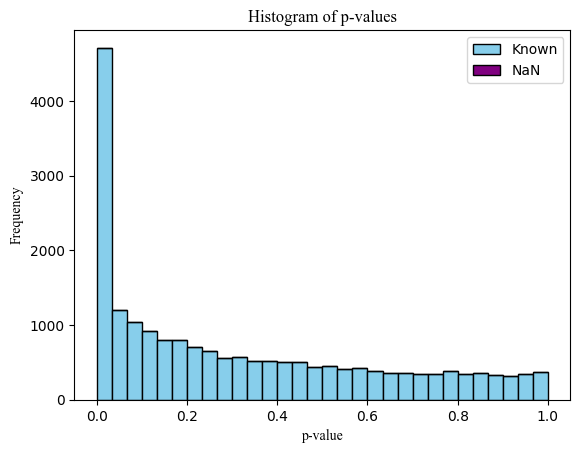

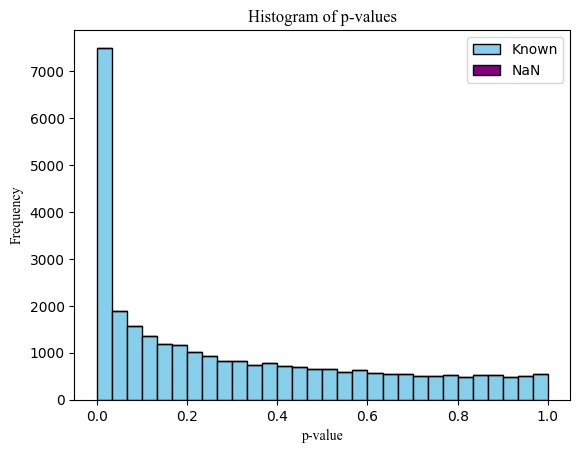

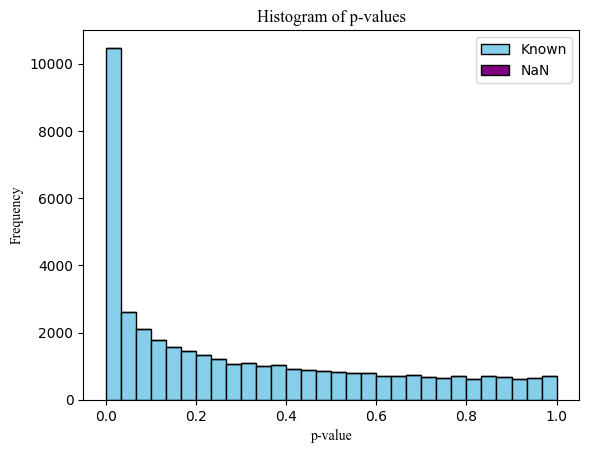

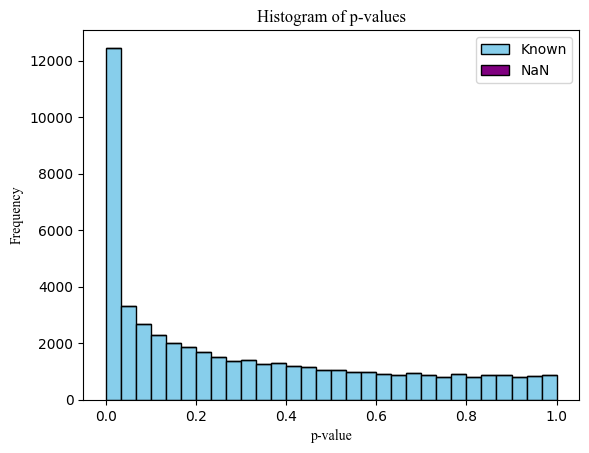

Histogram
Runtime for list length 1000: 0.23163080215454102 seconds
Histogram
Runtime for list length 5000: 0.13875651359558105 seconds
Histogram
Runtime for list length 10000: 0.12818312644958496 seconds
Histogram
Runtime for list length 20000: 0.13487982749938965 seconds
Histogram
Runtime for list length 30000: 0.11723685264587402 seconds
Histogram
Runtime for list length 40000: 0.14841127395629883 seconds
Histogram
Runtime for list length 50000: 0.11756253242492676 seconds


In [111]:
import time
from multidst.functions import multitest

# Original list of p-values
p_values2 = p_values[:50000]

# List lengths to test
list_lengths = [1000,5000, 10000, 20000, 30000, 40000, 50000]

# Store runtimes
runtimes = {}

for length in list_lengths:
    # Duplicate the list to the desired length
    # extended_p_values2 = p_values2 * (length // len(p_values2)) + p_values2[:length % len(p_values2)]
    # print(extended_p_values2)
    # Measure the runtime
    extended_p_values2 = p_values2[:length]
    start_time = time.time()
    #res = multitest(extended_p_values2, alpha=0.05, sigplot=True, results=True)
    g2_index = []
    multidst_hist(extended_p_values2, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')
    end_time = time.time()
    
    # Calculate and store the runtime
    runtimes[length] = end_time - start_time

# Output the runtimes
print("Histogram:")
for length, runtime in runtimes.items():
    print(f"Runtime for list length {length}: {runtime} seconds")
